In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import os 
import sys
sys.path.append("../")

from src import soporte_logistica_ensamble as sc

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)
%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_pickle("../data/preprocesado/datos_preprocesados.pkl")
df.head()

,Age,DistanceFromHome,Education,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,NumCompaniesWorked,TotalWorkingYears,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Attrition
0,1.552009,-0.386799,-0.889291,0.153595,0.146552,1.403148,-1.151253,-0.932702,2.484523,-0.983901,-0.680036,-1.148304,0.379939,-0.422833,0.259904,1.153777,-1.088567,-0.679394,-1.326654,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,-0.647878,0.106629,-1.866507,0.153595,0.146552,-0.491114,2.143183,0.242427,0.152848,-0.326418,-0.368086,-0.029481,-1.024300,2.364999,0.259904,-0.668839,1.770185,-1.079733,-0.679749,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1
2,-0.537884,0.970128,1.065140,0.165254,0.154546,2.721301,-0.053108,2.592685,-0.624377,-0.326418,-0.680036,-0.309186,0.379939,-0.422833,-0.660884,-0.668839,-2.517943,-0.679394,-0.809130,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,0.122082,-0.880227,2.042356,0.165254,0.140969,0.385675,-1.151253,2.592685,1.707298,0.166695,1.503618,0.250225,-1.024300,-0.422833,1.180691,1.153777,0.340809,0.121285,0.225918,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
4,-0.537884,0.106629,-1.866507,0.165254,0.146552,-0.883037,-0.876716,1.417556,-0.624377,-0.162047,-0.680036,-0.029481,0.379939,-0.422833,1.180691,-1.580148,0.340809,0.521625,-0.291606,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


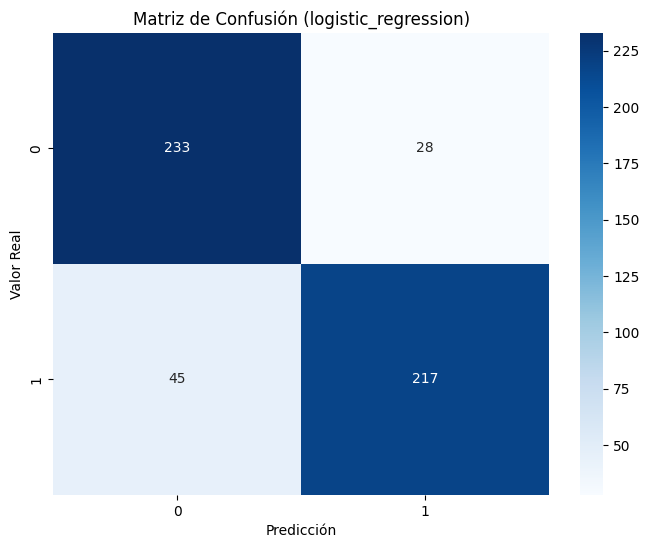

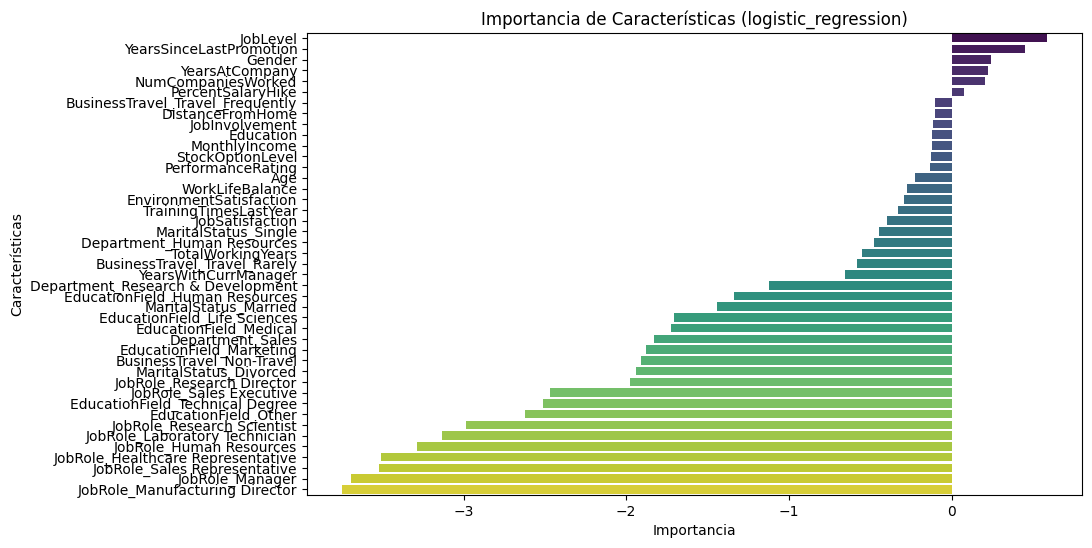

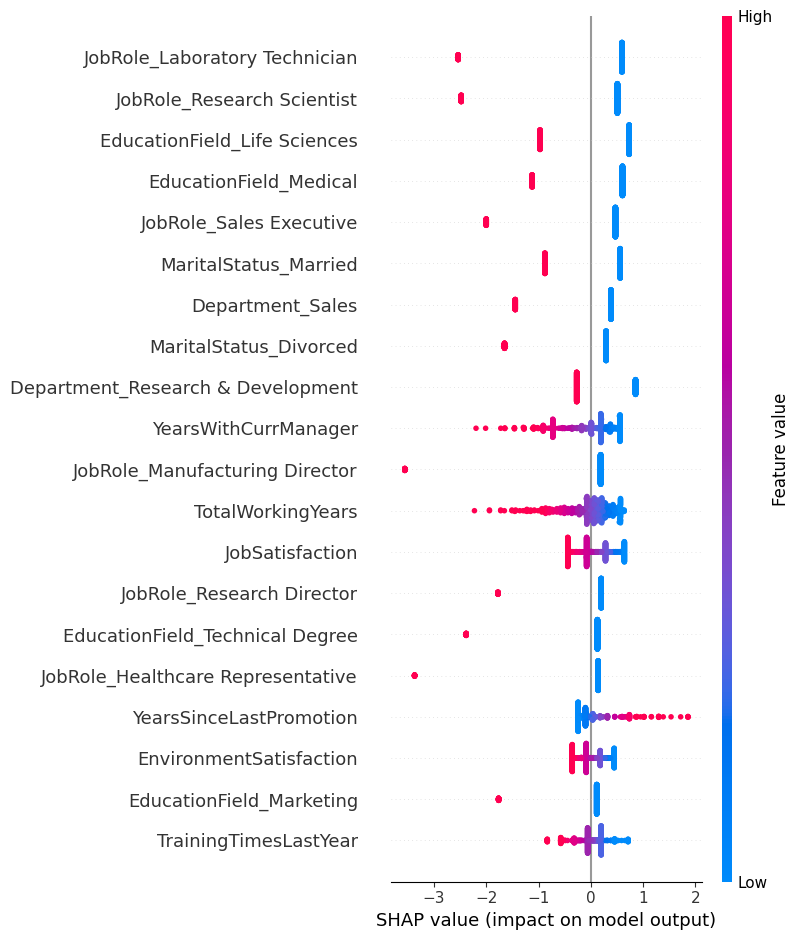

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.005978,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.005978,8.0,regresion logistica


In [3]:
# instanciamos la clase de regresión logistica
logistica = sc.AnalisisModelosClasificacion(dataframe = df, variable_dependiente = "Attrition")

# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("logistic_regression")

logistica.plot_matriz_confusion("logistic_regression")
logistica.importancia_predictores(modelo_nombre ='logistic_regression')
logistica.plot_shap_summary(modelo_nombre="logistic_regression")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados = logistica.calcular_metricas(modelo_nombre =  "logistic_regression" )
df_resultados["modelo"] = "regresion logistica"
df_resultados

El mejor modelo es DecisionTreeClassifier(max_depth=3, max_features=0.6, min_samples_leaf=15,
                       min_samples_split=20)


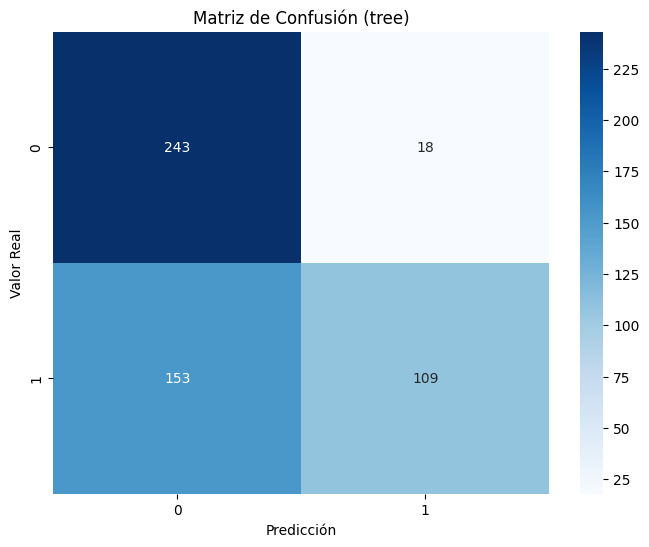

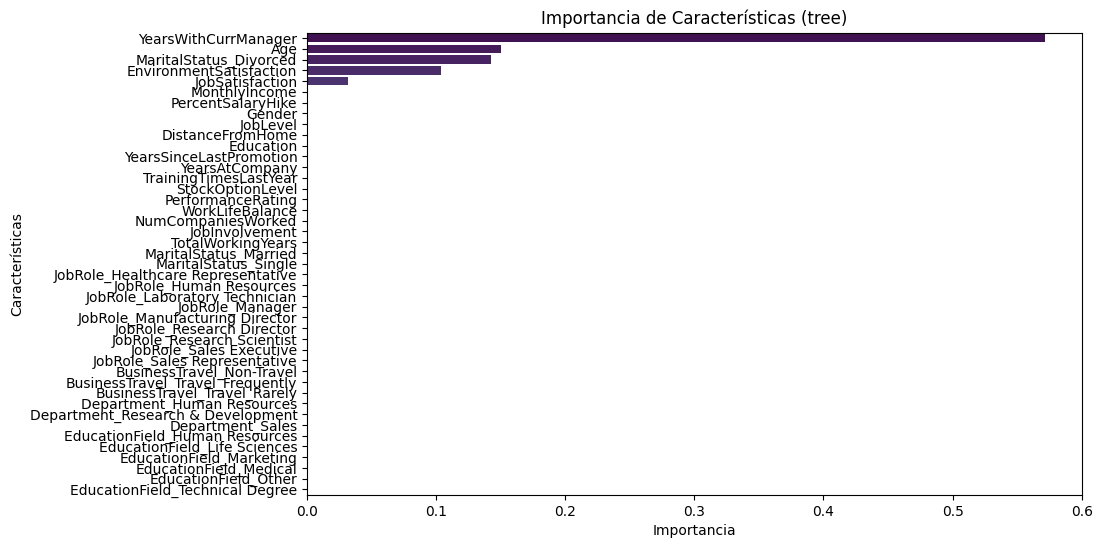

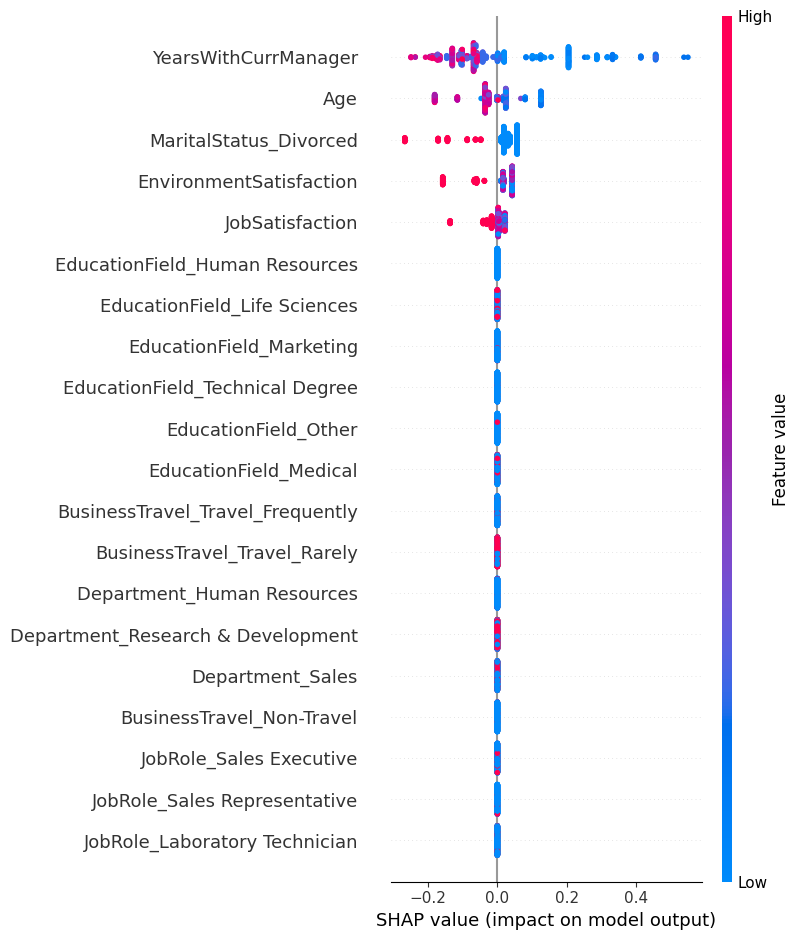

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.671613,0.740084,0.671613,0.646331,0.343058,0.764515,0.004973,8.0,NaN,NaN,decision tree
test,0.673040,0.736186,0.673040,0.649897,0.346723,0.780395,NaN,NaN,0.004973,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.005978,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.005978,8.0,regresion logistica


In [4]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("tree")

logistica.plot_matriz_confusion("tree")
logistica.importancia_predictores(modelo_nombre ='tree')
logistica.plot_shap_summary(modelo_nombre="tree")

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_tree = logistica.calcular_metricas(modelo_nombre =  "tree" )
df_resultados_tree["modelo"] = "decision tree"
df_resultados_final = pd.concat([df_resultados_tree, df_resultados], axis = 0)
df_resultados_final

El mejor modelo es RandomForestClassifier(max_depth=3, max_features=0.7, min_samples_leaf=10,
                       min_samples_split=30, n_estimators=150)


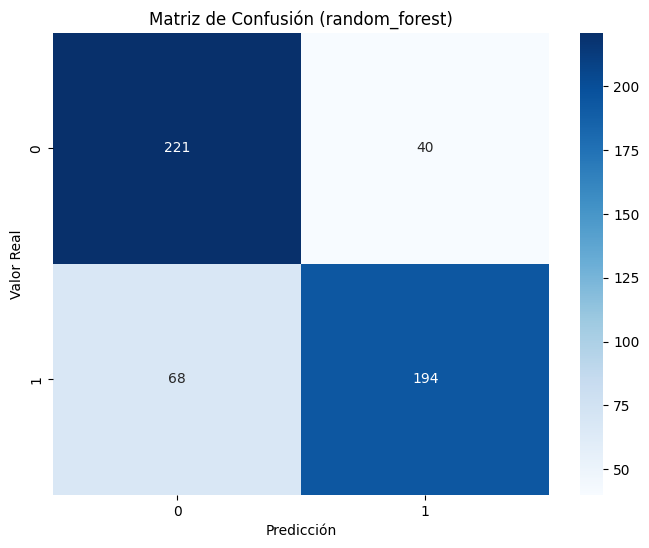

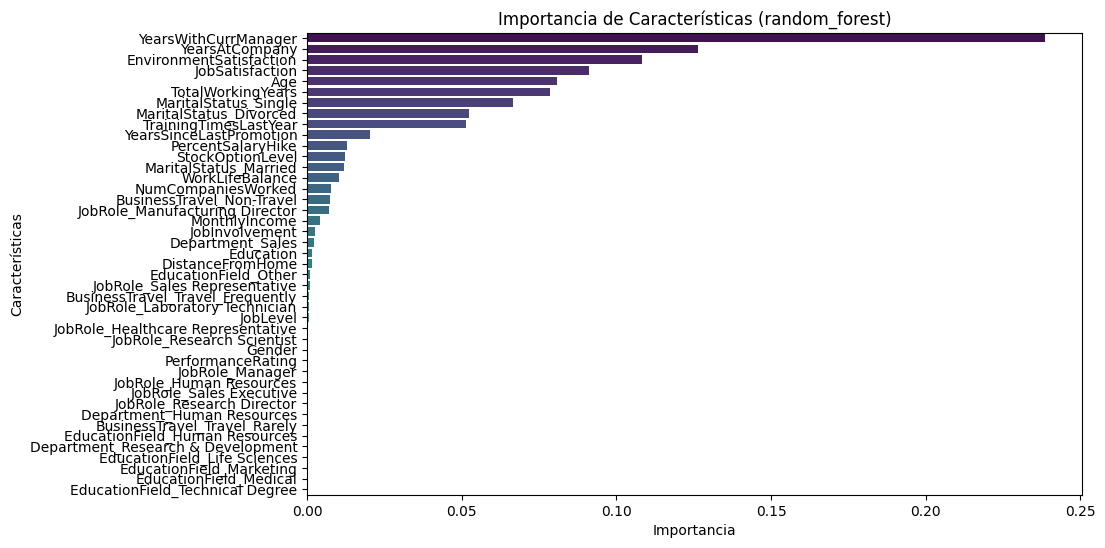

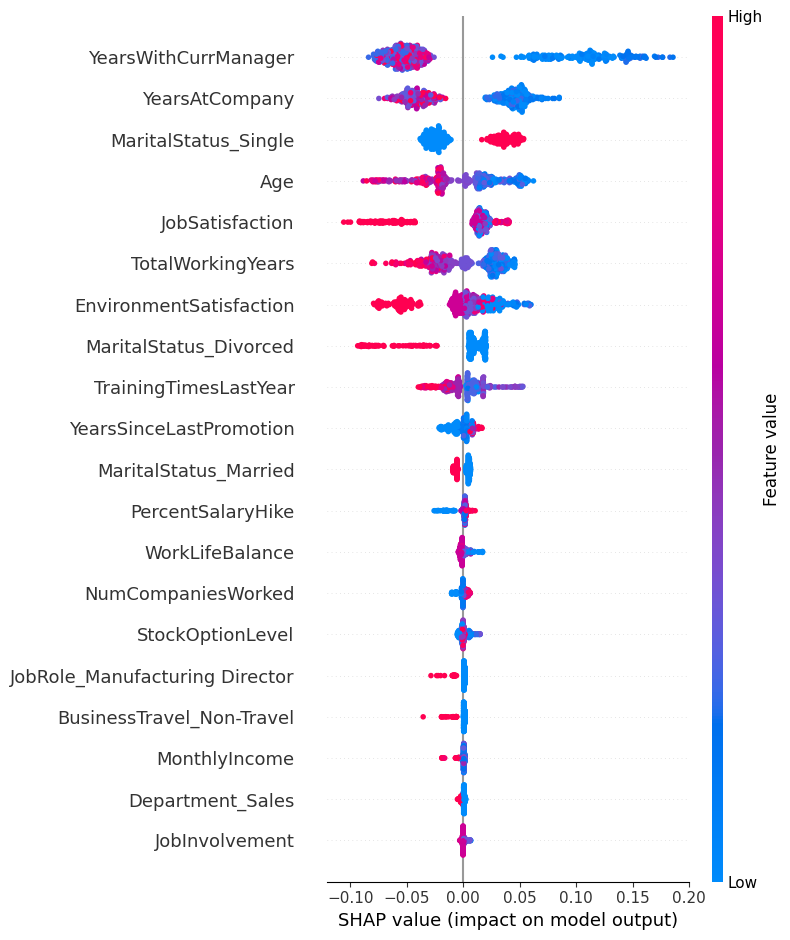

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.671613,0.740084,0.671613,0.646331,0.343058,0.764515,0.004973,8.0,NaN,NaN,decision tree
test,0.673040,0.736186,0.673040,0.649897,0.346723,0.780395,NaN,NaN,0.004973,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.005978,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.005978,8.0,regresion logistica
train,0.810436,0.814719,0.810436,0.809782,0.620850,0.896957,0.033078,NaN,NaN,NaN,random_forest
test,0.793499,0.796944,0.793499,0.792927,0.587081,0.888289,NaN,NaN,0.033078,NaN,random_forest


In [5]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("random_forest")

logistica.plot_matriz_confusion("random_forest")
logistica.importancia_predictores(modelo_nombre ='random_forest')
logistica.plot_shap_summary(modelo_nombre ='random_forest')

# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_forest = logistica.calcular_metricas(modelo_nombre =  "random_forest" )
df_resultados_forest["modelo"] = "random_forest"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_forest], axis = 0)
df_resultados_final

El mejor modelo es GradientBoostingClassifier(learning_rate=0.03, max_features=0.6,
                           min_samples_leaf=10, min_samples_split=25,
                           n_estimators=150, subsample=0.8)


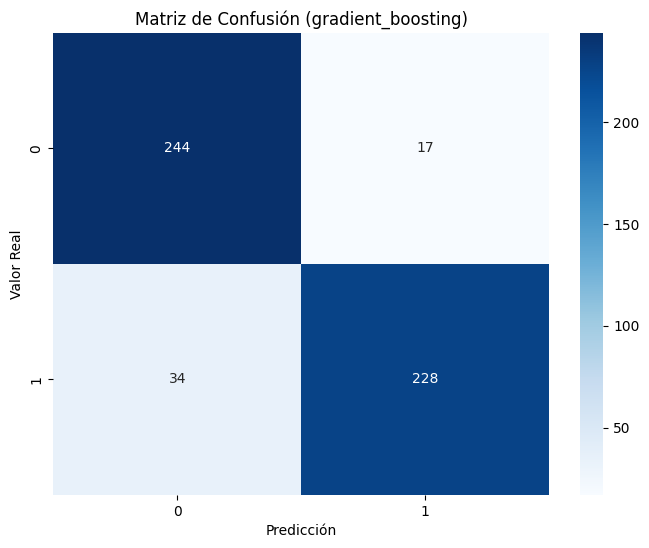

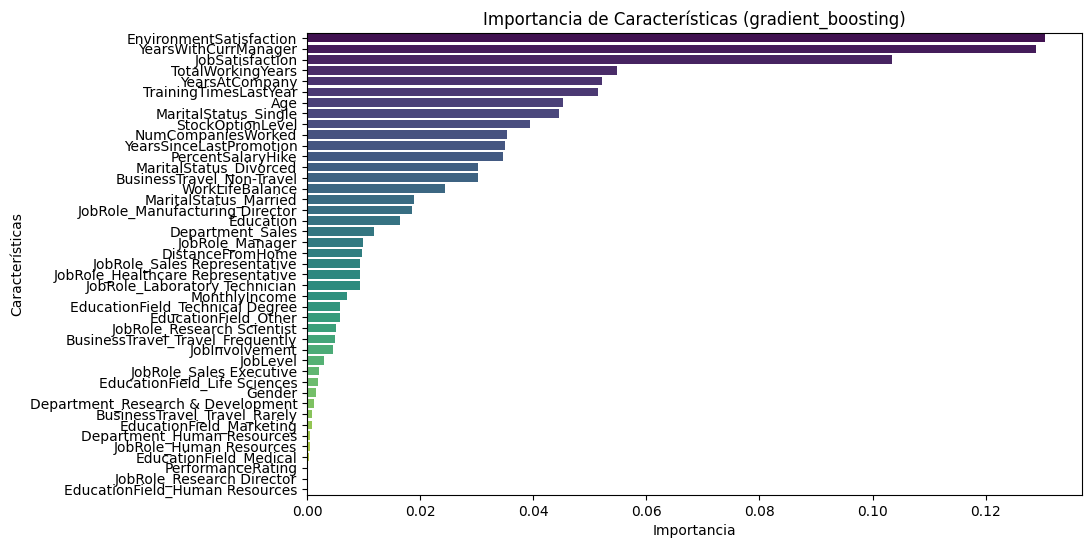

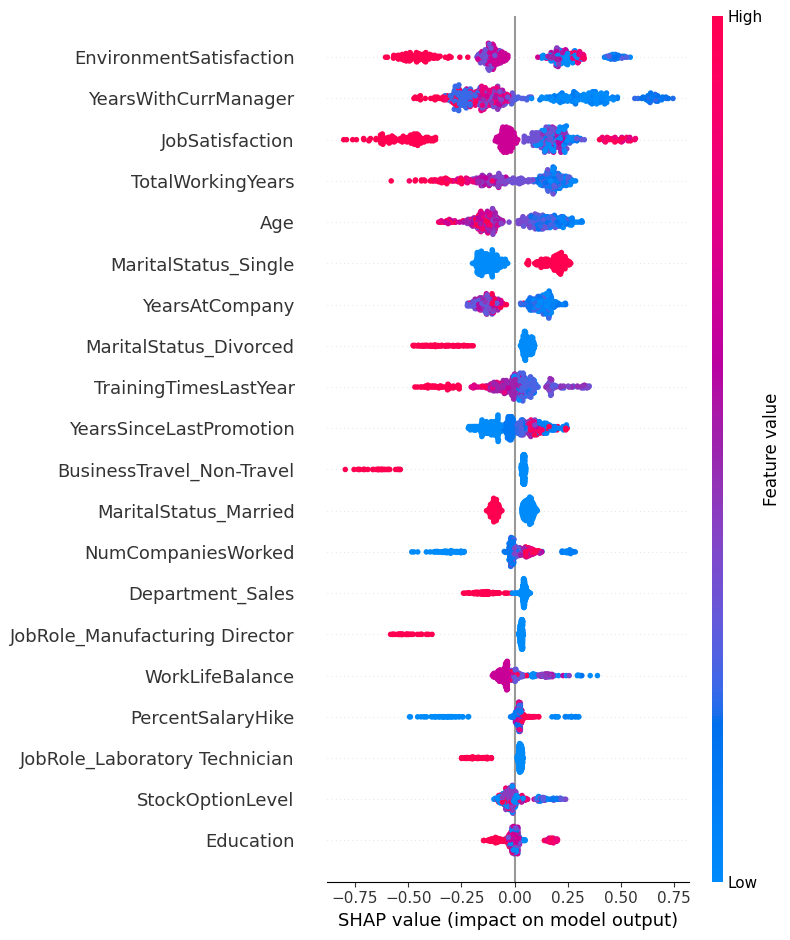

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.671613,0.740084,0.671613,0.646331,0.343058,0.764515,0.004973,8.0,NaN,NaN,decision tree
test,0.673040,0.736186,0.673040,0.649897,0.346723,0.780395,NaN,NaN,0.004973,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.005978,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.005978,8.0,regresion logistica
train,0.810436,0.814719,0.810436,0.809782,0.620850,0.896957,0.033078,NaN,NaN,NaN,random_forest
test,0.793499,0.796944,0.793499,0.792927,0.587081,0.888289,NaN,NaN,0.033078,NaN,random_forest
train,0.925802,0.926395,0.925802,0.925775,0.851601,0.971988,0.015037,8.0,NaN,NaN,gradient_boosting
test,0.902486,0.904206,0.902486,0.902389,0.804995,0.957299,NaN,NaN,0.015037,8.0,gradient_boosting


In [6]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("gradient_boosting")

logistica.plot_matriz_confusion("gradient_boosting")
logistica.importancia_predictores(modelo_nombre ='gradient_boosting')
logistica.plot_shap_summary(modelo_nombre="gradient_boosting")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_gradient = logistica.calcular_metricas(modelo_nombre =  "gradient_boosting" )
df_resultados_gradient["modelo"] = "gradient_boosting"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_gradient], axis = 0)
df_resultados_final


El mejor modelo es XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


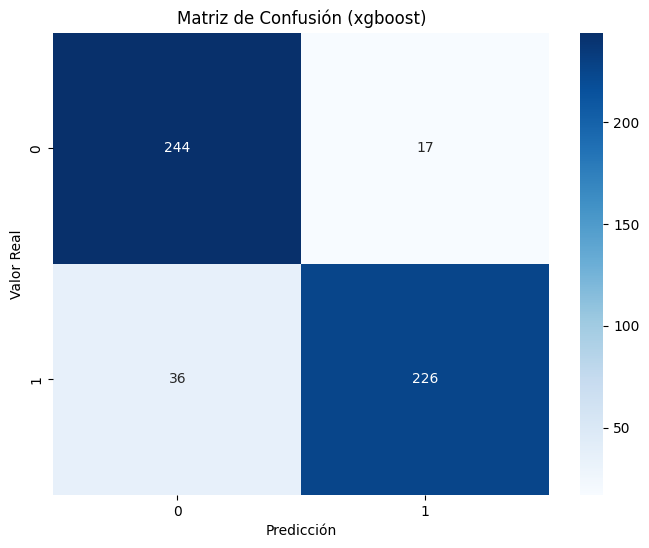

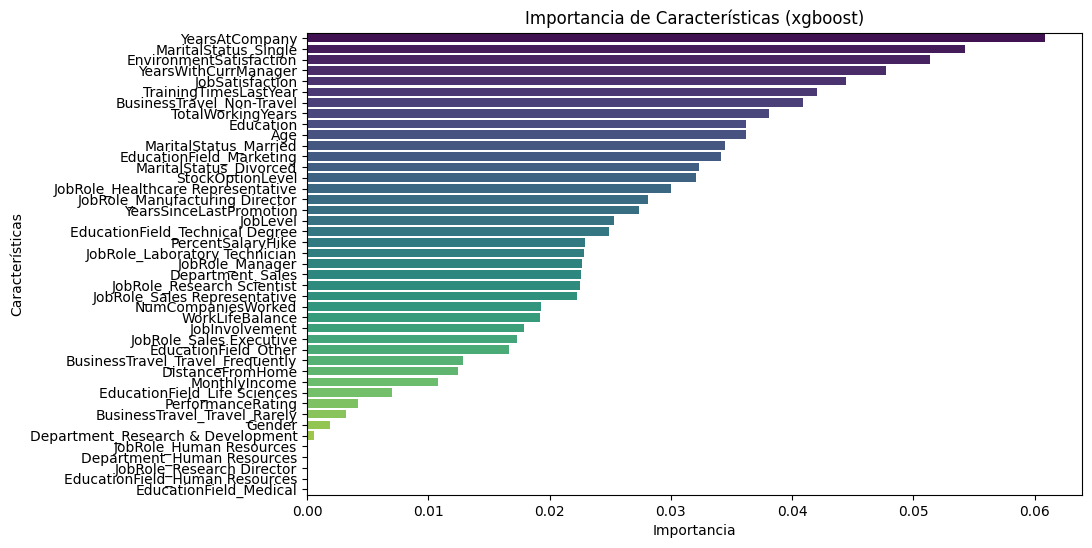

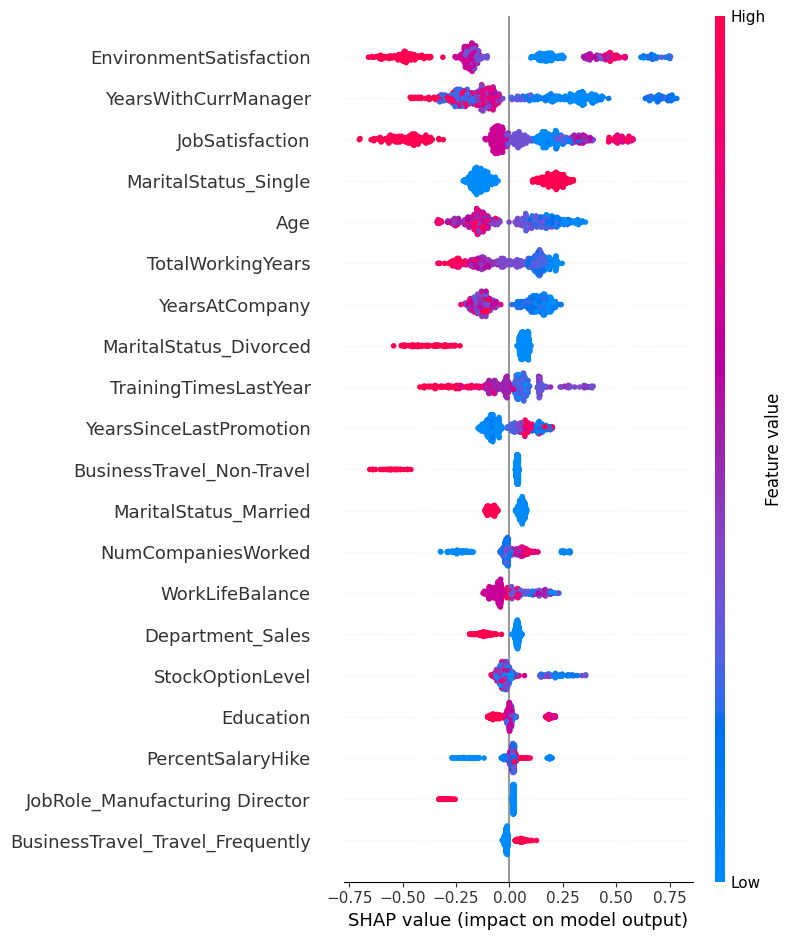

,accuracy,precision,recall,f1,kappa,auc,time_seconds,n_jobs,tiempo_computacion(segundos),nucleos_usados,modelo
train,0.671613,0.740084,0.671613,0.646331,0.343058,0.764515,0.004973,8.0,NaN,NaN,decision tree
test,0.673040,0.736186,0.673040,0.649897,0.346723,0.780395,NaN,NaN,0.004973,8.0,decision tree
train,0.880326,0.881342,0.880326,0.880244,0.760645,0.943809,0.005978,8.0,NaN,NaN,regresion logistica
test,0.860421,0.861967,0.860421,0.860282,0.720875,0.930011,NaN,NaN,0.005978,8.0,regresion logistica
train,0.810436,0.814719,0.810436,0.809782,0.620850,0.896957,0.033078,NaN,NaN,NaN,random_forest
test,0.793499,0.796944,0.793499,0.792927,0.587081,0.888289,NaN,NaN,0.033078,NaN,random_forest
train,0.925802,0.926395,0.925802,0.925775,0.851601,0.971988,0.015037,8.0,NaN,NaN,gradient_boosting
test,0.902486,0.904206,0.902486,0.902389,0.804995,0.957299,NaN,NaN,0.015037,8.0,gradient_boosting
train,0.916707,0.918693,0.916707,0.916606,0.833408,0.966989,0.034983,NaN,NaN,NaN,xgboost
test,0.898662,0.900791,0.898662,0.898535,0.797351,0.953628,NaN,NaN,0.034983,NaN,xgboost


In [7]:
# llamamos a la función para ajustar el modelo
logistica.ajustar_modelo("xgboost")

logistica.plot_matriz_confusion("xgboost")
logistica.importancia_predictores(modelo_nombre ='xgboost')
logistica.plot_shap_summary(modelo_nombre="xgboost")


# llamamos al metodo para obtener los resultaods de las predicciones
df_resultados_xgboost = logistica.calcular_metricas(modelo_nombre =  "xgboost" )
df_resultados_xgboost["modelo"] = "xgboost"
df_resultados_final = pd.concat([df_resultados_final, df_resultados_xgboost], axis = 0)
df_resultados_final

## Mejor Modelo:
**XGBoost**

Entrenamiento (train):

-   Accuracy, Precision, Recall, F1: 0.91

-   Kappa: 0.83

-   AUC: 0.96

Prueba (test):

-   Accuracy, Precision, Recall, F1: 0.89-0.90

-   Kappa: 0.79

-   AUC: 0.95

Conclusión:

XGBoost da un resultado parecido Gradient Boosting, por temas de rendimiento nos quedamos con XGBoost.